# work progress

1. Files are loaded, plotted
2. Agregating features required

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from glob import glob
import pandas as pd

In [2]:
files = glob("COC/measurements/1Nozzle_temp/*.csv")
print(files)

['COC/measurements/1Nozzle_temp\\COC1_P1 C_4021 001.csv', 'COC/measurements/1Nozzle_temp\\COC1_P2 C_4041 002.csv', 'COC/measurements/1Nozzle_temp\\COC2_P1 C_4022 001.csv', 'COC/measurements/1Nozzle_temp\\COC2_P2 C_4055 001.csv', 'COC/measurements/1Nozzle_temp\\COC3_P1 C_4015 001.csv', 'COC/measurements/1Nozzle_temp\\COC3_P2 C_4011 001.csv', 'COC/measurements/1Nozzle_temp\\COC4_P1 C_4019 001.csv', 'COC/measurements/1Nozzle_temp\\COC4_P2 C_4002 001.csv', 'COC/measurements/1Nozzle_temp\\COC5_P1 C_3971 001.csv', 'COC/measurements/1Nozzle_temp\\COC5_P2 C_3981 001.csv', 'COC/measurements/1Nozzle_temp\\COC6_P1 C_3989 001.csv', 'COC/measurements/1Nozzle_temp\\COC6_P2 C_3987 001.csv', 'COC/measurements/1Nozzle_temp\\COC7_P1 C_3978 001.csv', 'COC/measurements/1Nozzle_temp\\COC7_P2 C_3976 001.csv', 'COC/measurements/1Nozzle_temp\\COC8_P1 C_3951 001.csv', 'COC/measurements/1Nozzle_temp\\COC8_P2 C_3964 001.csv', 'COC/measurements/1Nozzle_temp\\COC9_P1 C_3952 001.csv', 'COC/measurements/1Nozzle_temp

In [3]:
def read_COC(fname:str):
    data =  pd.read_csv(fname, decimal='.', skiprows=1)
    name_alias = ['Sample Time Domain Signal x axis', 'X',
       'WaveNumber', 'Sample Spectrum', 'Sample Phase x axis',
       'Sample Phase', 'Reference Time Domain Signal x axis',
       'Reference Time Domain Signal', 'Reference Spectrum x axis',
       'Reference Spectrum', 'Reference Phase x axis', 'Reference Phase',
       'Transmittance x axis', 'Transmittance', 'Transmittance Phase x axis',
       'Transmittance Phase', 'Absorbance x axis', 'Absorbance',
       'Refractive Indices x axis', 'Refractive',
       'Absorption Co-efficient x axis', 'Absorption',
       'Dielectric Constant (Real) x axis', 'Dielectric Constant (Real)',
       'Dielectric Constant (Imag) x axis', 'Dielectric Constant (Imag)']
    
    data.columns = name_alias
    return data

In [4]:
import os
data = {}
for file in files:
    data[os.path.basename(file)] = read_COC(file)

In [5]:
data.keys()

dict_keys(['COC1_P1 C_4021 001.csv', 'COC1_P2 C_4041 002.csv', 'COC2_P1 C_4022 001.csv', 'COC2_P2 C_4055 001.csv', 'COC3_P1 C_4015 001.csv', 'COC3_P2 C_4011 001.csv', 'COC4_P1 C_4019 001.csv', 'COC4_P2 C_4002 001.csv', 'COC5_P1 C_3971 001.csv', 'COC5_P2 C_3981 001.csv', 'COC6_P1 C_3989 001.csv', 'COC6_P2 C_3987 001.csv', 'COC7_P1 C_3978 001.csv', 'COC7_P2 C_3976 001.csv', 'COC8_P1 C_3951 001.csv', 'COC8_P2 C_3964 001.csv', 'COC9_P1 C_3952 001.csv', 'COC9_P2 C_3941 001.csv'])

# lookup
1. WaveNumber
2. Refractive
3. Absorbtion

C:\Users\Kamil\AppData\Local\Temp\ipykernel_5604\2895065776.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


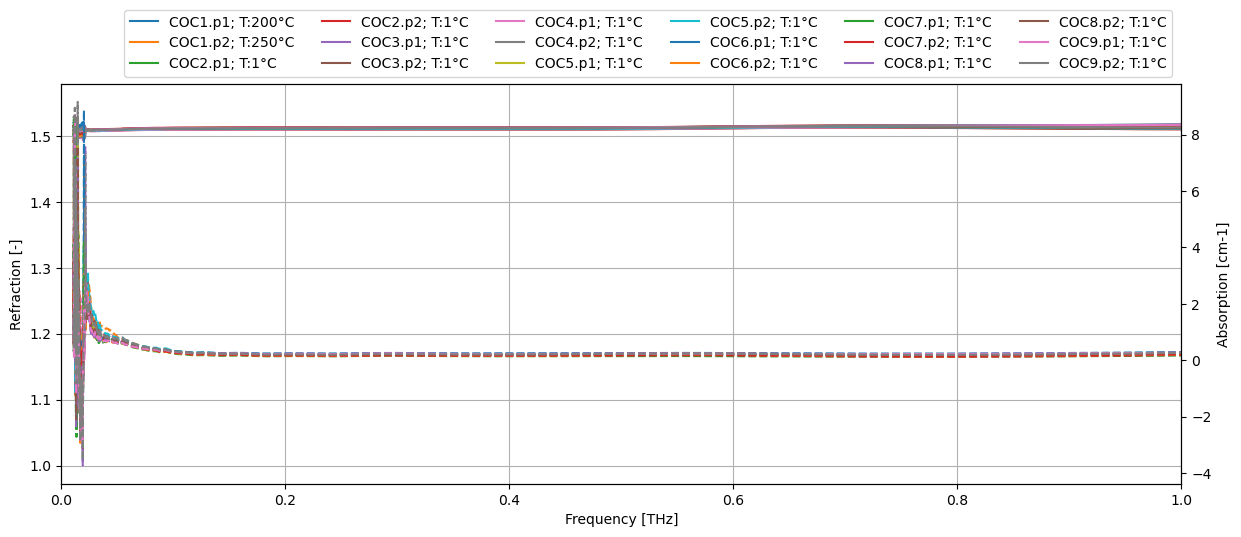

In [6]:
refabs_fig = plt.figure(figsize=(7,5))
ref_ax = refabs_fig.add_axes([.1,.1,1.6,.8])
abs_ax = ref_ax.twinx()
_C1000 = 299792458*1000
_xax_mlt = 10e-12
_xax_label_unit = 'THz'

_name_temperature_map = {
    'COC1_P1 C_4021 001.csv':'200',
    'COC1_P2 C_4041 002.csv':'250',
    'COC2_P1 C_4022 001.csv':'1',
    'COC2_P2 C_4055 001.csv':'1',
    'COC3_P1 C_4015 001.csv':'1',
    'COC3_P2 C_4011 001.csv':'1',
    'COC4_P1 C_4019 001.csv':'1',
    'COC4_P2 C_4002 001.csv':'1',
    'COC5_P1 C_3971 001.csv':'1',
    'COC5_P2 C_3981 001.csv':'1',
    'COC6_P1 C_3989 001.csv':'1',
    'COC6_P2 C_3987 001.csv':'1',
    'COC7_P1 C_3978 001.csv':'1',
    'COC7_P2 C_3976 001.csv':'1',
    'COC8_P1 C_3951 001.csv':'1',
    'COC8_P2 C_3964 001.csv':'1',
    'COC9_P1 C_3952 001.csv':'1',
    'COC9_P2 C_3941 001.csv':'1'}

def name_map(filename) ->str:
    s_id = filename[:4]
    s_p = filename[6]
    return f"{s_id}.p{s_p}; T:{_name_temperature_map.get(filename)}°C"

name = {}

for sample, serie in data.items():
    ref_ax.plot(_C1000/serie.WaveNumber*_xax_mlt, serie.Refractive, 
                label=name_map(sample))
    abs_ax.plot(_C1000/serie.WaveNumber*_xax_mlt, serie.Absorption, '--',
                label=name_map(sample))
ref_ax.legend(bbox_to_anchor=(0.05, 1, 0, 0), ncol = 6)
#abs_ax.legend(loc='lower right')
#ref_ax.axis.set_major_formatter(ticker.FormatStrFormatter('%0.1f THz'))

ref_ax.set_xlim([0,1])
ref_ax.set_xlabel(f"Frequency [{_xax_label_unit}]")
ref_ax.set_ylabel("Refraction [-]")
abs_ax.set_ylabel("Absorption [cm-1]")
ref_ax.grid()
plt.tight_layout()
plt.savefig("wykres.png", bbox_inches = 'tight')

from statistics import mean
data.keys()
def extract_key(filename) ->str:
    return [file_item[:4] for file_item in filename]

groupKeys = set(extract_key(list(data.keys())))
mdata = pd.DataFrame()
groups = {k: [] for k in groupKeys }
for key in data.keys():
    groups[key[:4]].append(key)
#find samples

important_headers = ['WaveNumber','Absorbance', 'Refractive']
jdata = pd.DataFrame()

for sample, dframe in data.items():
    tm_data = pd.DataFrame()
    for header in important_headers:
        tm_data[header] = dframe[header]
    jdata = pd.DataFrame.merge([jdata, tm_data], 'right', on='WaveNumber')